In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
results_paths = [
    "final/30_jun_sp_att_def_aa_epsilon/evaluations/evaluation_results/results.json",
    "tests_2/ryu_1p_diff_8/evaluations/evaluation_results/results.json",
    "final/ryu_1p_batchsize_1024/evaluations/evaluation_results/results.json",
]

In [34]:
reward_infos = []
stages_infos = []
arcade_infos = []
for path in results_paths:
    with open(path) as f:
        results = json.load(f)
        reward_infos.append(results["rewards_infos"])
        stages_infos.append(results["stages_infos"])
        arcade_infos.append(results["arcade_runs_infos"])
all_results = [reward_infos, stages_infos, arcade_infos]

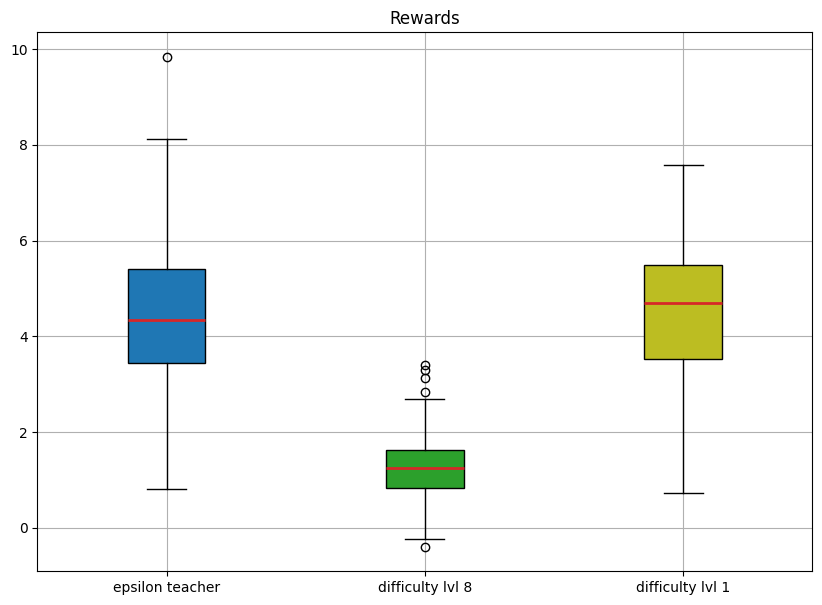

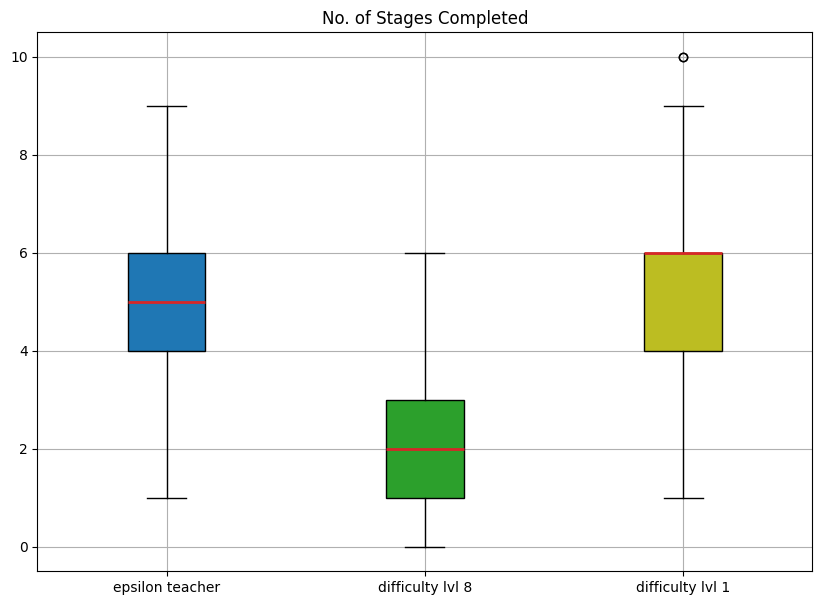

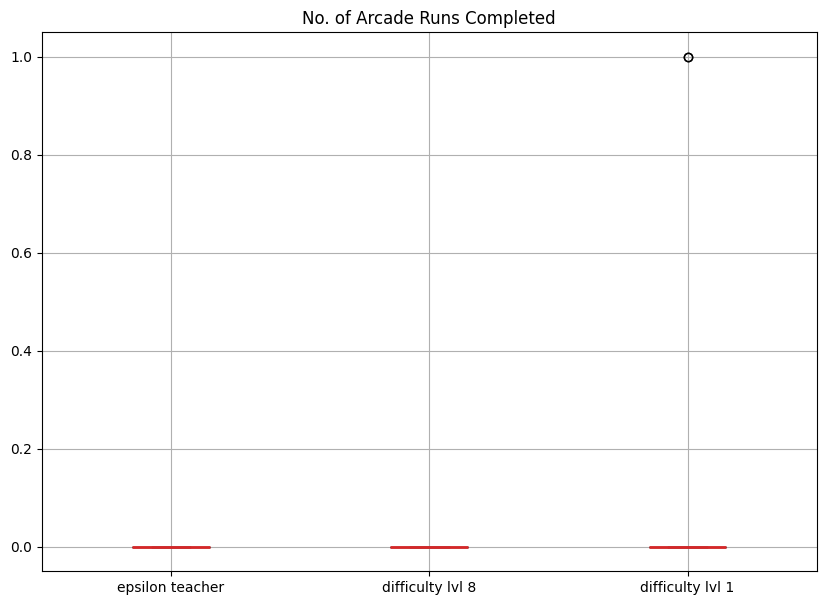

In [ ]:
titles = ["Rewards", "No. of Stages Completed", "No. of Arcade Runs Completed"]
colors = ["tab:blue","tab:green","tab:olive","tab:cyan"]
x_tick_labels = [
    "epsilon teacher",
    "difficulty lvl 8",
    "difficulty lvl 1",
]
for idx, results in enumerate(all_results):
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111)
    bp = ax.boxplot(
        results,
        patch_artist=True,
        notch=False,
        vert=0
    )
    for patch, color in zip(bp["boxes"], colors):
        patch.set_facecolor(color)
    for median in bp["medians"]:
        median.set(color="tab:red", linewidth=2)
    # vp = ax.violinplot(
    #     results,
    #     showmeans=False,
    #     showmedians=True,
    # )
    ax.set_title(titles[idx])
    ax.set_xticklabels(x_tick_labels)
    ax.grid()
    plt.show()